2.2 Tokenizing Text

In [1]:
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/refs/heads/main/ch02/01_main-chapter-code/the-verdict.txt"
    urllib.request.urlretrieve(url, "the-verdict.txt")

In [2]:
with open("the-verdict.txt", "r") as f:
    raw_text = f.read()

In [3]:
len(raw_text)

20479

In [4]:
import re
text = "Hello, world! This is a test. Let's see how it works."

result = re.split(r'(\s)',text)

print(result)

['Hello,', ' ', 'world!', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test.', ' ', "Let's", ' ', 'see', ' ', 'how', ' ', 'it', ' ', 'works.']


In [5]:
result = re.split(r'([,.]|\s)',text)
print(result)

['Hello', ',', '', ' ', 'world!', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '', ' ', "Let's", ' ', 'see', ' ', 'how', ' ', 'it', ' ', 'works', '.', '']


In [6]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world!', 'This', 'is', 'a', 'test', '.', "Let's", 'see', 'how', 'it', 'works', '.']


In [7]:
text = "Hello, world! This --- is a test. Let's see how it works."

result = re.split(r'([,.:;?_!"()\']|--|\s)',raw_text)
result = [item for item in result if item.strip()]
preprocessed = result

In [8]:
len(preprocessed)

4690

2.3 Converting tokens into token IDs

In [9]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 1130


In [10]:
vocab = {word : i for i, word in enumerate(all_words)}
print(vocab)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon-dancers': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Ri

In [11]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: word for word, i in vocab.items()}

    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',text)
        preprocessed = [item for item in preprocessed if item.strip()]
        ids = [self.str_to_int[word] for word in preprocessed]
        return ids
    
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [12]:
tokenizer = SimpleTokenizerV1(vocab)

In [13]:
text = """I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)"""

In [14]:
ids = tokenizer.encode(text)
print(ids)

[53, 44, 149, 1003, 57, 38, 818, 115, 256, 486, 6, 1002, 115, 500, 435, 392, 6, 908, 585, 1077, 709, 508, 961, 1016, 663, 1016, 535, 987, 5, 568, 988, 538, 722, 549, 496, 5, 533, 514, 370, 549, 748, 5, 661, 115, 841, 1102, 5, 157, 397, 547, 568, 115, 1066, 727, 988, 84, 7, 3, 99, 53, 818, 1003, 585, 1120, 530, 208, 85, 734, 34, 7, 4]


2.4 Adding special context tokens - unknown words and such

In [15]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<unk>"])


vocab = {word: i for i, word in enumerate(all_tokens)}
print(len(vocab))

for i, word in enumerate(list(vocab.items())[-5:]):
    print(f"{i}: {word}")

1132
0: ('younger', 1127)
1: ('your', 1128)
2: ('yourself', 1129)
3: ('<|endoftext|>', 1130)
4: ('<unk>', 1131)


In [16]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: word for word, i in vocab.items()}

    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]

        # Add <unk> token for unknown words
        preprocessed = [item if item in self.str_to_int else "<unk>" for item in preprocessed]

        ids = [self.str_to_int[word] for word in preprocessed]
        return ids
    
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [17]:
tokenizer = SimpleTokenizerV1(vocab)

In [18]:
tokenizer.encode("I am  helllooo genius.")

[53, 150, 1131, 486, 7]

2.5 Byte Pair Encoding (BPE)

In [19]:
import tiktoken

In [20]:
tokenizer = tiktoken.get_encoding("gpt2")

In [21]:
tokenizer.encode("I am  helllooo genius. good to see you.", allowed_special={"<|endoftext|>"})

[40, 716, 220, 5968, 29680, 78, 15632, 13, 922, 284, 766, 345, 13]

2.6 Data sampling with a sliding window

In [22]:
with open("the-verdict.txt", "r") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))
print(enc_text[:20])

5145
[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438]


In [23]:
enc_sample = enc_text[50:]

In [24]:
context_size = 4  # 4 tokens
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:   {y}")

x: [290, 4920, 2241, 287]
y:   [4920, 2241, 287, 257]


In [25]:
for i in range(1, context_size + 1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    # print([desired])

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [26]:
import torch

In [27]:
torch.__version__

'2.7.0+cpu'

### Use of Dataset

The `Dataset` class from `torch.utils.data` is used to represent a dataset in PyTorch. It provides an interface to load and preprocess data efficiently. By subclassing `Dataset`, you can define how to load your data and what each data sample should look like.

In this notebook, the `GPTDatasetV1` class is implemented to tokenize text data and create overlapping sequences of input and target tokens using a sliding window approach. This dataset is then used with a `DataLoader` to enable batch processing and efficient data loading during training or evaluation.

In [28]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the text
        token_ids = tokenizer.encode(txt, allowed_special={"|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1:i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [29]:
def create_dataloader_v1(txt, batch_size=2, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):

    #initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create the dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create the DataLoader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader


In [30]:
with open("the-verdict.txt", "r") as f:
    raw_text = f.read()

```markdown
### Importance of Stride in Avoiding Overfitting

The `stride` parameter in a sliding window approach determines the step size by which the window moves across the tokenized text. It plays a crucial role in balancing the trade-off between data redundancy and overfitting:

1. **Reducing Redundancy**:
    - A smaller stride creates overlapping sequences, which increases the amount of training data. However, excessive overlap can lead to redundancy, where the model sees almost identical input-target pairs repeatedly. This redundancy can cause the model to memorize patterns instead of generalizing, leading to overfitting.

2. **Increasing Diversity**:
    - A larger stride reduces overlap between sequences, ensuring that the model is exposed to more diverse input-target pairs. This diversity helps the model learn generalizable patterns rather than memorizing specific sequences.

3. **Efficient Use of Data**:
    - By carefully choosing the stride, you can maximize the use of available data without introducing excessive redundancy. This is particularly important when working with limited datasets.

#### Example:
Suppose we have a tokenized text sequence: `[1, 2, 3, 4, 5, 6, 7, 8]`, and we use a sliding window of size `4`.

- With a stride of `1`, the generated sequences will be:
  - Input: `[1, 2, 3, 4]`, Target: `[2, 3, 4, 5]`
  - Input: `[2, 3, 4, 5]`, Target: `[3, 4, 5, 6]`
  - Input: `[3, 4, 5, 6]`, Target: `[4, 5, 6, 7]`
  - Input: `[4, 5, 6, 7]`, Target: `[5, 6, 7, 8]`

- With a stride of `2`, the generated sequences will be:
  - Input: `[1, 2, 3, 4]`, Target: `[2, 3, 4, 5]`
  - Input: `[3, 4, 5, 6]`, Target: `[4, 5, 6, 7]`
  - Input: `[5, 6, 7, 8]`, Target: `[6, 7, 8]`

In summary, the stride parameter helps control the balance between data augmentation (through overlapping sequences) and the risk of overfitting. A well-chosen stride ensures that the model learns meaningful patterns while avoiding memorization of repetitive data.

In [31]:
dataloader = create_dataloader_v1(raw_text, batch_size=2, max_length=4, stride=1, shuffle=True, drop_last=True, num_workers=0)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(f"Input IDs: {first_batch[0]}")
print(f"Target IDs: {first_batch[1]}")

Input IDs: tensor([[  366, 47914,  1298,   319],
        [  373,   262,   530,  7090]])
Target IDs: tensor([[47914,  1298,   319,   326],
        [  262,   530,  7090,   883]])


2.7 Creating token embeddings

In [32]:
input_ids = torch.tensor([2,3,5,1])

In [33]:
# dir(tokenizer) to see its attributes

In [34]:
vocab_size = 6
output_dim = 3

# torch.manual_seed(123)

embedding_layer = torch.nn.Embedding(tokenizer.n_vocab, output_dim)

In [35]:
print(embedding_layer.weight.shape)

torch.Size([50257, 3])


In [36]:
print(embedding_layer.weight)
print(embedding_layer(torch.tensor([3]))) # weight with index 3

Parameter containing:
tensor([[ 1.3633,  0.2565, -0.0961],
        [-0.9221, -0.7746, -0.9668],
        [-0.1743,  1.1869,  0.0251],
        ...,
        [-0.4915,  0.4663,  1.6264],
        [ 0.3493, -1.1968, -0.4429],
        [-0.4544,  0.1047,  1.6087]], requires_grad=True)
tensor([[-0.6692, -0.8622,  0.5965]], grad_fn=<EmbeddingBackward0>)


2.8 Encoding Word Positions

In [37]:
vocab_size = tokenizer.n_vocab
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [38]:
max_length = 4
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print(f"Input IDs: {inputs}")
print(f"Target IDs: {targets}")

Input IDs: tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Target IDs: tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


Add token embeding with positional embeddings to get the actuial input embeddings

In [39]:
token_embeddings = token_embedding_layer(inputs)
token_embeddings.shape

torch.Size([8, 4, 256])

In [40]:
context_length = max_length
print(context_length,output_dim)

pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

4 256


In [41]:
torch.arange(max_length)

tensor([0, 1, 2, 3])

In [42]:
pos_embedding_layer.weight
token_embedding_layer.weight

Parameter containing:
tensor([[ 0.4088,  1.2109,  0.0140,  ..., -1.5870,  0.7703,  0.4062],
        [ 1.7653, -0.5633,  0.7863,  ...,  0.1247,  0.9599,  1.2374],
        [-1.3675,  1.7316, -0.8095,  ..., -0.0545,  1.6678,  0.2409],
        ...,
        [ 2.3657,  1.5845,  0.8899,  ..., -0.0824, -0.0478,  1.8299],
        [ 1.8002,  2.4408,  0.2107,  ...,  0.7845, -0.2787,  1.8947],
        [-0.0785, -1.0014,  0.3345,  ...,  0.0846,  0.4292,  0.0232]],
       requires_grad=True)

In [43]:
pos_embedding_layer(torch.arange(max_length))

tensor([[-1.8071,  0.8408,  1.2023,  ..., -0.3775,  0.9030, -0.0372],
        [-0.0054,  1.0021, -0.8043,  ..., -0.4835, -2.1447, -0.3478],
        [ 0.4897,  1.4632, -0.4386,  ..., -0.1087, -0.4748,  0.3454],
        [-0.2053,  2.1852, -0.5965,  ...,  0.6122, -0.5675, -0.5945]],
       grad_fn=<EmbeddingBackward0>)

In [44]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [45]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


In [46]:
import torch
inputs = torch.tensor(
 [[0.43, 0.15, 0.89], # Your (x^1)
 [0.55, 0.87, 0.66], # journey (x^2)
 [0.57, 0.85, 0.64], # starts (x^3)
 [0.22, 0.58, 0.33], # with (x^4)
 [0.77, 0.25, 0.10], # one (x^5)
 [0.05, 0.80, 0.55]] # step (x^6)
)

In [47]:
query = inputs[1]  # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [48]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [49]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [50]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [51]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


3.3.2 Computing attention weights for all input tokens


In [52]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [53]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [54]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [55]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)

print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [56]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


3.4 Implementing self-attention with trainable weights


3.4.1 Computing the attention weights step by step


In [57]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [58]:
torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [59]:
W_query

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])

In [60]:
query_2 = x_2 @ W_query # Common for all the inputs to calculate q9(2)
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

In [61]:
query_2

tensor([0.4306, 1.4551])

In [62]:
keys = inputs @ W_key
values = inputs @ W_value

print("Keys.shape:", keys.shape)
print("Values.shape:", values.shape)

Keys.shape: torch.Size([6, 2])
Values.shape: torch.Size([6, 2])


Calculate attention scores

First, let’s compute the attention score ω22:

In [63]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


Again, we can generalize this computation to all attention scores via matrix
multiplication:

In [64]:
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [65]:
d_k = keys.shape[1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print("Attention weights:", attn_weights_2)

Attention weights: tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [66]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


3.4.2 Implementing a compact self-attention Python class

In [67]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        context_vec = attn_weights @ values
        return context_vec

In [68]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [69]:
m = torch.nn.Linear(2, 3)
print(m.weight)
print(m.bias)

Parameter containing:
tensor([[-0.1668,  0.2270],
        [ 0.5000,  0.1317],
        [ 0.1934,  0.6825]], requires_grad=True)
Parameter containing:
tensor([-0.3189,  0.2240, -0.3146], requires_grad=True)


In [70]:
import torch.nn as nn
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        context_vec = attn_weights @ values
        return context_vec

In [71]:
torch.manual_seed(123)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)


3.5 Hiding future words with causal attention

In [72]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1717, 0.1762, 0.1761, 0.1555, 0.1627, 0.1579],
        [0.1636, 0.1749, 0.1746, 0.1612, 0.1605, 0.1652],
        [0.1637, 0.1749, 0.1746, 0.1611, 0.1606, 0.1651],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.1632, 0.1674],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.1639],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)


In [73]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [74]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1717, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1749, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1637, 0.1749, 0.1746, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.0000, 0.0000],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<MulBackward0>)


In [75]:
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple = masked_simple / row_sums
print(masked_simple)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3190, 0.3408, 0.3402, 0.0000, 0.0000, 0.0000],
        [0.2445, 0.2545, 0.2542, 0.2468, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2058, 0.1935, 0.1953, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<DivBackward0>)


In [76]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.3111,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602,   -inf,   -inf,   -inf,   -inf],
        [0.1667, 0.2602, 0.2577,   -inf,   -inf,   -inf],
        [0.0510, 0.1080, 0.1064, 0.0643,   -inf,   -inf],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121,   -inf],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MaskedFillBackward0>)


In [77]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3190, 0.3408, 0.3402, 0.0000, 0.0000, 0.0000],
        [0.2445, 0.2545, 0.2542, 0.2468, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2058, 0.1935, 0.1953, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)


3.5.2 Masking additional attention weights with dropout

In [78]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [79]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6380, 0.6816, 0.6804, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5090, 0.5085, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4120, 0.0000, 0.3869, 0.0000, 0.0000],
        [0.0000, 0.3418, 0.3413, 0.3308, 0.3249, 0.0000]],
       grad_fn=<MulBackward0>)


3.5.3 Implementing a compact causal attention class

In [80]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [81]:
import torch.nn as nn
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.transpose(1, 2)
        attn_scores.masked_fill_(
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec
    

🧠 Attention Score = Q × Kᵀ
To compute attention scores, we need to perform a dot product between each query and all keys (for each token).

That means we want to do:

python
Copy
Edit
(B, T, d) @ (B, d, T) → (B, T, T)
To do this, we must transpose keys from (B, T, d) to (B, d, T), which is done by:

python
Copy
Edit
keys.transpose(1, 2)  # Swaps dimensions 1 and 2 (T ↔ d)
So now:

python
Copy
Edit
queries @ keys.transpose(1, 2)
shape: (B, T, d) @ (B, d, T) → (B, T, T)

In [82]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, dropout=0.0)
context_vecs = ca(batch)
print(context_vecs.shape)
print(context_vecs)

torch.Size([2, 6, 2])
tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


3.6 Extending single-head attention to multi-head attention

3.6.1 Stacking multiple single-head attention layers

In [83]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) 
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


torch.manual_seed(123)

context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


3.6.2 Implementing multi-head attention with weight splits

In [84]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        # As in `CausalAttention`, for inputs where `num_tokens` exceeds `context_length`, 
        # this will result in errors in the mask creation further below. 
        # In practice, this is not a problem since the LLM (chapters 4-7) ensures that inputs  
        # do not exceed `context_length` before reaching this forwar

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

torch.manual_seed(123)

batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


4.1 Coding an LLM architecture

In [85]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False,
}

In [86]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

In [87]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [89]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output Shape", logits.shape)
print(logits)

Output Shape torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6754, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


4.2 Normalizing activations with layer normalization

In [91]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5)
layer = nn.Sequential(nn.Linear(5,6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [215]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:", mean)
print("Variance:", var)

Mean: tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance: tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [216]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)

print("Normalized Output:", out_norm)
print("Mean after normalization:", mean)
print("Variance after normalization:", var)

Normalized Output: tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean after normalization: tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance after normalization: tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [217]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [218]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift


In [219]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)

In [220]:
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)

print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


4.3 Implementing a feed forward network with GELU activations

In [221]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * 
            (x + 0.044715 * torch.pow(x, 3))
        ))

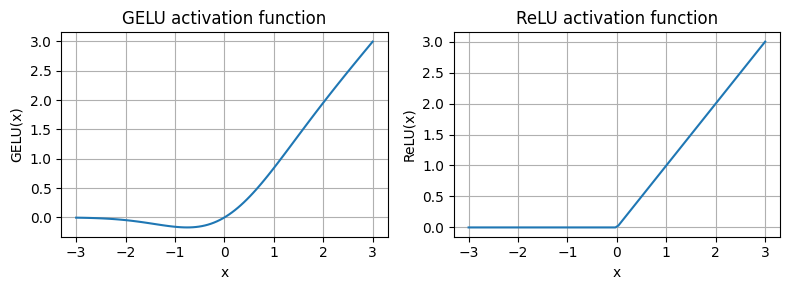

In [222]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [223]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),  # First linear layer
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),  # Second linear layer
        )

    def forward(self, x):
        return self.layers(x)


In [224]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2,3,768)
out = ffn(x)
print("Output shape:", out.shape)
print("Output:", out)

Output shape: torch.Size([2, 3, 768])
Output: tensor([[[ 0.1238,  0.0457,  0.0939,  ...,  0.1107,  0.0167, -0.1992],
         [ 0.1574, -0.0282,  0.0049,  ...,  0.0026,  0.1120, -0.1075],
         [ 0.1184, -0.0052,  0.0839,  ...,  0.1662,  0.0112, -0.1685]],

        [[ 0.1302,  0.0630,  0.1050,  ...,  0.1439,  0.0562, -0.1128],
         [ 0.1249, -0.0073,  0.1022,  ...,  0.0417,  0.0381, -0.0828],
         [ 0.0494,  0.0654,  0.0347,  ...,  0.0701,  0.0793, -0.1810]]],
       grad_fn=<ViewBackward0>)


4.4 Adding shortcut connections


In [227]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x

def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)
    
    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [228]:
layer_sizes = [3, 3, 3, 3, 3, 1]  

sample_input = torch.tensor([[1., 0., -1.]])

torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.0001201116101583466
layers.2.0.weight has gradient mean of 0.0007152041653171182
layers.3.0.weight has gradient mean of 0.001398873864673078
layers.4.0.weight has gradient mean of 0.005049646366387606


In [229]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169792652130127
layers.1.0.weight has gradient mean of 0.20694106817245483
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732502937317
layers.4.0.weight has gradient mean of 1.3258541822433472
